In [1]:
# nbi:hide_in
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import nbinteract as nbi
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure, savefig
from pandas import DataFrame
from IPython.display import HTML
import sys 
sys.path.append('/home/nico/.local/lib/python3.8/site-packages')
from lcapy import Circuit


fig_sz_x = 10
fig_sz_y = 10
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 14

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# <span style="color:blue">  Transformación de funciones </span>

En esta sección veremos como ciertas transformaciones de una función afecta su gráfica. Esto también nos ayudara a realizar las gráficas de nuestras señales. Veremos las transformaciones de **desplazamiento, reflexión y estiramiento.** Las operaciones entre funciones escapan del alcance de este texto.

## <span style="color:red">  Desplazamiento vertical </span>

<div class="alert alert-block alert-info">
<b> Sumar una constante </b> a una función <b>desplazara</b> su gráfica en dirección <b>vertical</b> hacia <b>arriba</b>  si la <b>constante</b>  es <b>positiva</b> y hacia <b>abajo</b> si la <b>constante</b> es <b>negativa</b>.
    
$$g(x) = f(x) + c$$    
</div> 

En los gráficos podemos ver como **cada punto de la gráfica** se desplaza **c** unidades hacia arriba para $c > 0$ ó haca abajo para $c < 0$

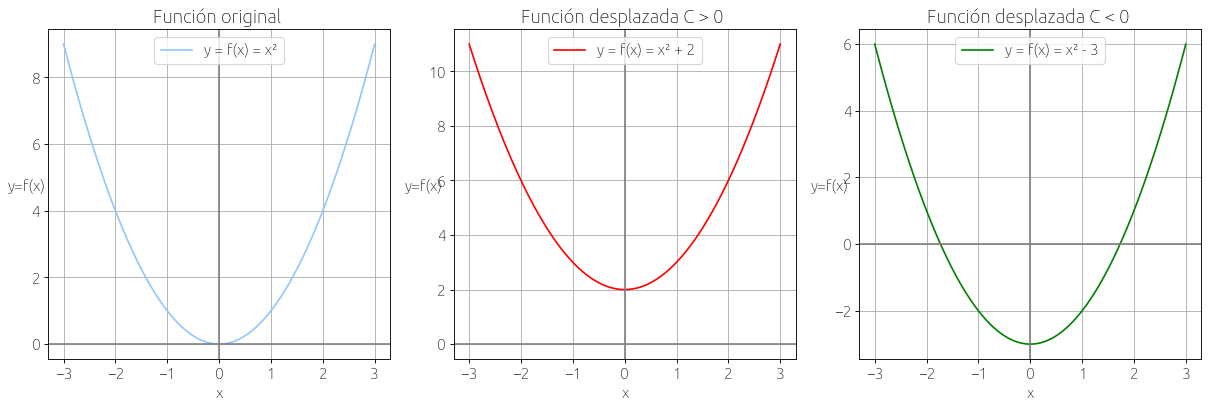

In [231]:
# nbi:hide_in
%matplotlib inline

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

x  = np.linspace(-3,3,1000)
y  = x**2
y1 = x**2 + 2
y2 = x**2 - 3

#grafico de las las funciones
fig = plt.figure(figsize=(15, 5), dpi= fig_dpi , constrained_layout=True)
gs = fig.add_gridspec(1, 3)

#grafico de la función original
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title("Función original ")
f_ax1.plot(x,y,label='y = f(x) = x²')
f_ax1.set_xlabel("x")
f_ax1.set_ylabel('y=f(x)',rotation='horizontal')
f_ax1.axhline(0, color='grey')
f_ax1.axvline(0, color='grey')
f_ax1.grid()
f_ax1.legend(loc = 'best')

#grafico de la fucnión desplazada hacia arriba
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("Función desplazada C > 0 " )
f_ax2.plot(x,y1,color='r', label='y = f(x) = x² + 2')
f_ax2.set_xlabel('x')
f_ax2.set_ylabel('y=f(x)',rotation='horizontal')
f_ax2.axhline(0, color='grey')
f_ax2.axvline(0, color='grey')
f_ax2.legend(loc='upper center')
f_ax2.grid()



#grafico de la fucnión desplazada hacia abajo
f_ax3 = fig.add_subplot(gs[0, 2])
f_ax3.set_title("Función desplazada C < 0 " )
f_ax3.plot(x,y2,color='g', label='y = f(x) = x² - 3')
f_ax3.set_xlabel('x')
f_ax3.set_ylabel('y=f(x)',rotation='horizontal')
f_ax3.axhline(0, color='grey')
f_ax3.axvline(0, color='grey')
f_ax3.legend(loc='upper center')
f_ax3.grid()




<div class="alert alert-block alert-warning"> 
    
<b>Para terminar de comprender el proceso les dejo una animación que muestra a la función sumándole una constante <i>C</i> que va desde $-5$ a $5$ con pasos de $1$. Solo tienen que presionar play.</b>
</div>    

In [2]:
# nbi:hide_in
%matplotlib inline
from matplotlib.animation import FuncAnimation

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(8, 6), dpi= fig_dpi, facecolor='w', edgecolor='k')
ax = plt.axes(xlim=(-5, 5), ylim=(-6, 30))
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.grid('on')
texto = ['$y=x²-5$', '$y=x²-4$', '$y=x²-3$', '$y=x²-2$', '$y=x²-1$', '$y=x²$', '$y=x²+1$', '$y=x²+2$', 
                 '$y=x²+3$', '$y=x²+4$', '$y=x²+5$']


line, = ax.plot([], [], lw=2)
c = np.arange(-5,6,1)
x = np.linspace(-5, 5, 1000)

text = ax.text(0,23,texto[0],fontsize=16,bbox=dict(facecolor='lightblue', alpha=1),
                horizontalalignment='center', verticalalignment='bottom')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    plt.close() # por algun motivo que desconozco poniendolo aca borra el plot extra que aparece.
    if i == 0:
        #ax.plot(x, x**2, lw=2,color='red', label='$y=x²$')
        #ax.legend(loc='upper center')
        ax.plot(x, x**2, lw=2,color='red')
        ax.text(0,27,'$y = x²$',fontsize=16,bbox=dict(facecolor='red', alpha=0.5),
                horizontalalignment='center', verticalalignment='bottom')
        
    y = x**2 + c[i]
    line.set_data(x, y)
    text.set_text(texto[i])
    

    return line,text,

anim = FuncAnimation(fig, animate, init_func=init, frames=11, interval=1000, blit=True)
HTML(anim.to_jshtml())

#anim.save('imagenes/sine_wave.gif', writer='imagemagick')

## <span style="color:red">  Desplazamiento horizontal </span>

<div class="alert alert-block alert-info">
<b> Sumar una constante a la variable independiente </b> a una función <b>desplazara</b> su gráfica en sobre el $eje$ $horizontal$. Si la <b>constante</b>  es <b>positiva</b> se desplazará hacia la <b>izquierda</b> y si la <b>constante</b>  es <b>negativa</b> (se resta en ves de sumar) se desplazará hacia la <b>derecha</b>.
    
$$g(x) = f(x+c) ;c>0$$
    
$$h(x) = f(x-c) ; c>0$$
</div> 

El valor de $h(x)=f(x-c)$ en $x$ es el mismo que el valor de $f(x)$ en $x-c$, puesto que $x-c$ esta $c$ unidades a la izquierda de $x$. Se deduce que la gráfica de h(x)=f(x-c) es la gráfica de $f(x)$ desplazada a la izquierda $c$ unidades. De la misma forma se demuestra que $g(x)=f(x+c)$  es la gráfica de $f(x)$ desplazada $c$ unidades a la derecha $c$ unidades.

En los gráficos podemos ver para $c > 0$ como **cada punto de la gráfica de f(x)** se desplaza **c** unidades hacia la **derecha** para **graficar  para $h(x) = f(x-c)$** y **c** unidades hacia la **izquierda** para **graficar  para $g(x) = f(x+c)$**.

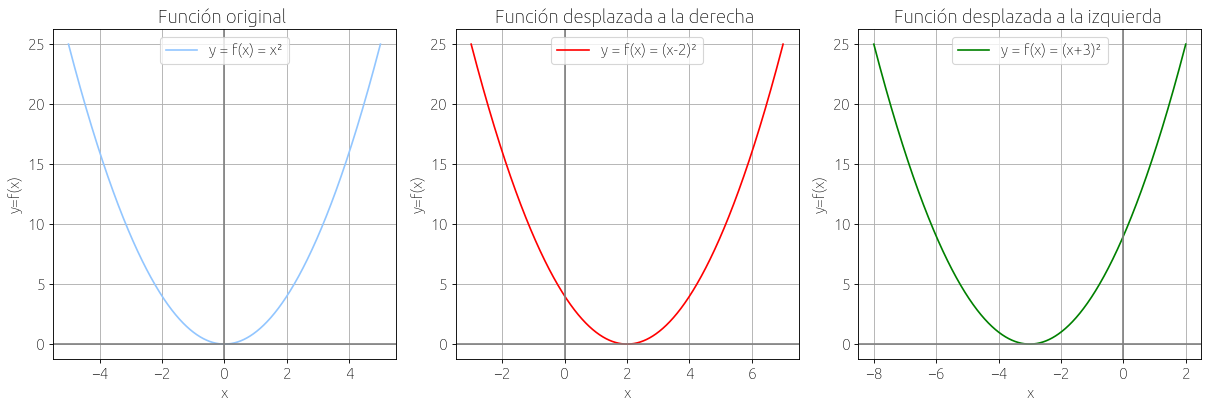

In [288]:
# nbi:hide_in
%matplotlib inline

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

x  = np.linspace(-5,5,1000)
x1  = np.linspace(-3,7,1000)
x2  = np.linspace(-8,2,1000)
y  = x**2
y1 = (x1-2)**2
y2 = (x2+3)**2

#grafico de las las funciones
fig = plt.figure(figsize=(15, 5), dpi= fig_dpi , constrained_layout=True)
gs = fig.add_gridspec(1, 3)

#grafico de la función original
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title("Función original ")
f_ax1.plot(x,y,label='y = f(x) = x²')
f_ax1.set_xlabel("x")
f_ax1.set_ylabel('y=f(x)')
f_ax1.axhline(0, color='grey')
f_ax1.axvline(0, color='grey')
f_ax1.grid()
f_ax1.legend(loc = 'upper center')

#grafico de la fucnión desplazada hacia arriba
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("Función desplazada a la derecha " )
f_ax2.plot(x1,y1,color='r', label='y = f(x) = (x-2)²')
f_ax2.set_xlabel('x')
f_ax2.set_ylabel('y=f(x)')
f_ax2.axhline(0, color='grey')
f_ax2.axvline(0, color='grey')
f_ax2.legend(loc='upper center')
f_ax2.grid()


#grafico de la fucnión desplazada hacia abajo
f_ax3 = fig.add_subplot(gs[0, 2])
f_ax3.set_title("Función desplazada a la izquierda " )
f_ax3.plot(x2,y2,color='g', label='y = f(x) = (x+3)²')
f_ax3.set_xlabel('x')
f_ax3.set_ylabel('y=f(x)')
f_ax3.axhline(0, color='grey')
f_ax3.axvline(0, color='grey')
f_ax3.legend(loc='upper center')
f_ax3.grid()



<div class="alert alert-block alert-warning"> 
    
<b>Para terminar de comprender el proceso les dejo una animación que muestra a la función sumándole una constante <i>C</i> que va desde $-5$ a $5$ con pasos de $1$. Solo tienen que presionar play.</b>
</div> 

In [3]:
# nbi:hide_in
%matplotlib inline
from matplotlib.animation import FuncAnimation

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(8, 6), dpi= fig_dpi, facecolor='w', edgecolor='k')
ax = plt.axes(xlim=(-6, 6), ylim=(0, 4))
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.grid('on')
texto = ['$y=(x+5)²$', '$y=(x+4)²$', '$y=(x+3)²$', '$y=(x+2)²$', '$y=(x+1)²$', '$y=x²$',
         '$y=(x-1)²$', '$y=(x-2)²$', '$y=(x-3)²$', '$y=(x-4)²$', '$y=(x-5)²$']


line, = ax.plot([], [], lw=2)
c = np.arange(-5,6,1)
x = np.linspace(-6, 6, 1000)

text = ax.text(0,3.2,texto[0],fontsize=16,bbox=dict(facecolor='lightblue', alpha=1),
                horizontalalignment='center', verticalalignment='bottom')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    plt.close() # por algun motivo que desconozco poniendolo aca borra el plot extra que aparece.
    if i == 0:
        #ax.plot(x, x**2, lw=2,color='red', label='$y=x²$')
        #ax.legend(loc='upper center')
        ax.plot(x, x**2, lw=2,color='red')
        ax.text(0,3.7,texto[5],fontsize=16,bbox=dict(facecolor='red', alpha=0.5),
                horizontalalignment='center', verticalalignment='bottom')
        
    y = (x - c[i])**2
    line.set_data(x, y)
    text.set_text(texto[i])
    

    return line,text,

anim = FuncAnimation(fig, animate, init_func=init, frames=11, interval=1000, blit=True)
HTML(anim.to_jshtml())

#anim.save('imagenes/sine_wave.gif', writer='imagemagick')

## <span style="color:red">  Reflexión de la gráfica</span>

<div class="alert alert-block alert-info">
<b> Colocar un signo "$-$" delante </b> de una función <b> invertirá su gráfica</b> respecto al eje $eje$ $horizontal$. Si la <b>colocar un signo "-" delante</b>  de la <b>variable independiente $(x)$</b> se <b> invertirá su gráfica</b> respecto al eje $eje$ de $ordenadas$
    
$$g(x) = -f(x) $$
    
$$h(x) = f(-x) $$
</div> 

Las coordenadas $y$ de cada punto sobre la gráfica de $y=-f(x)$ es simplemente el negativo de la coordenada $y$ del punto correspondiente en la gráfica de $y=f(x)$. Por lo tanto, la gráfica es la reflexión de la gráfica de $y=f(x)$ en el $eje$ $x$. Por otro lado, el valor de $y=f(-x)$ en $x$ es el mismo que el valor de $y=f(x)$ en $-x$ por consiguiente, la gráfica deseada aquí es la reflexión de la gráfica de $y=f(x)$ en el $eje$ $y$.

En los gráficos podemos ver esto de forma clara.

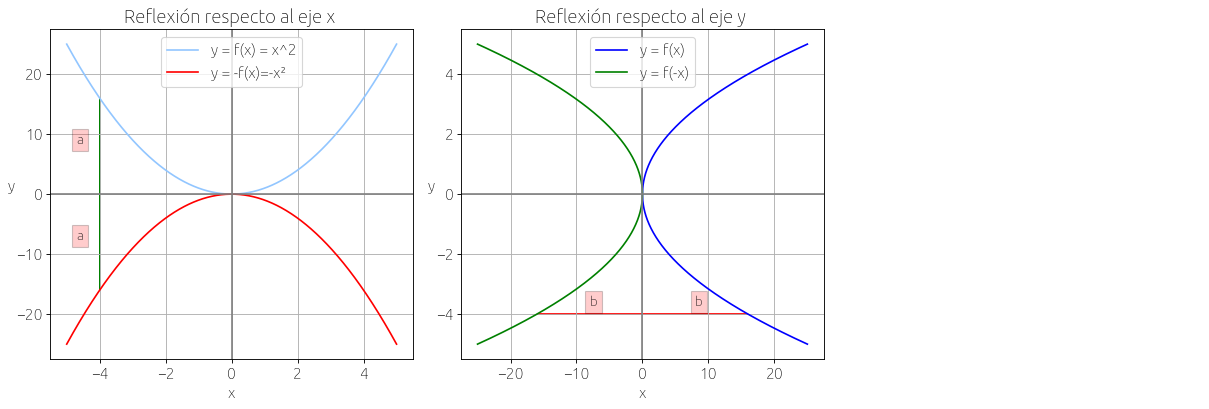

In [328]:
# nbi:hide_in
%matplotlib inline

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

x  = np.linspace(-5,5,1000)
y2 = np.linspace(-5,5,1000)
y  = x**2
y1 = -y
x2 = y2**2
x3 = -(y2)**2

#grafico de las las funciones
fig = plt.figure(figsize=(15, 5), dpi= fig_dpi , constrained_layout=True)
gs = fig.add_gridspec(1, 3)

#grafico de la función original
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title("Reflexión respecto al eje x ")
f_ax1.plot(x,y,label='y = f(x) = x^2')
f_ax1.plot(x,y1,color='r', label='y = -f(x)=-x²')
f_ax1.set_xlabel("x")
f_ax1.set_ylabel('y', rotation='horizontal')
f_ax1.axhline(0, color='grey')
f_ax1.axvline(0, color='grey')
f_ax1.arrow(-4, -16, 0, 32,color='g',length_includes_head=True, shape='full')
f_ax1.text(-4.7,-8,'a',fontsize=12,bbox=dict(facecolor='red', alpha=0.2),
                horizontalalignment='left', verticalalignment='bottom')
f_ax1.text(-4.7,8,'a',fontsize=12,bbox=dict(facecolor='red', alpha=0.2),
                horizontalalignment='left', verticalalignment='bottom')
f_ax1.grid()
f_ax1.legend(loc = 'upper center')

#grafico de la fucnión desplazada hacia arriba
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("Reflexión respecto al eje y " )
f_ax2.plot(x2,y2,color='b', label='y = f(x)')
f_ax2.plot(x3,y2,color='g', label='y = f(-x)')
f_ax2.set_xlabel('x')
f_ax2.set_ylabel('y', rotation='horizontal')
f_ax2.axhline(0, color='grey')
f_ax2.axvline(0, color='grey')
f_ax2.arrow(-16, -4, 32, 0, color='r',length_includes_head=True, shape='full')
f_ax2.text(-8,-3.8, 'b',fontsize=12,bbox=dict(facecolor='red', alpha=0.2),
                horizontalalignment='left', verticalalignment='bottom')
f_ax2.text(8, -3.8,'b',fontsize=12,bbox=dict(facecolor='red', alpha=0.2),
                horizontalalignment='left', verticalalignment='bottom')
f_ax2.legend(loc='upper center')
f_ax2.grid()




## <span style="color:red">  Estiramiento y acortamiento vertical </span>

<div class="alert alert-block alert-info">
<b>  Al multiplicar  una constante </b> a una función <b> cambiará si tamaño</b> respecto al eje $eje$ $y$. Si $contante>1$ la función aumentara de tamaño verticalmente. Si por el contrario la $1>constante>0$ la función dismiuirá de tamaño verticalmente.
    
$$g(x) = c*f(x); c > 1 $$ 
    
$$h(x) = c*f(x); 1>c>0 $$
</div> 

Las coordenadas $y$ de $y=c*f(x)$ en $x$ es la misma que la coordenada $y$ correspondiente de $y=f(x)$ multiplicada por $c$. Multiplicar la coordenada $y$ por  $c$ tiene el mismo efecto de alargar y acortar verticalmente la gráfica por un factor de $c$.

En los gráficos podemos ver esto de forma clara.

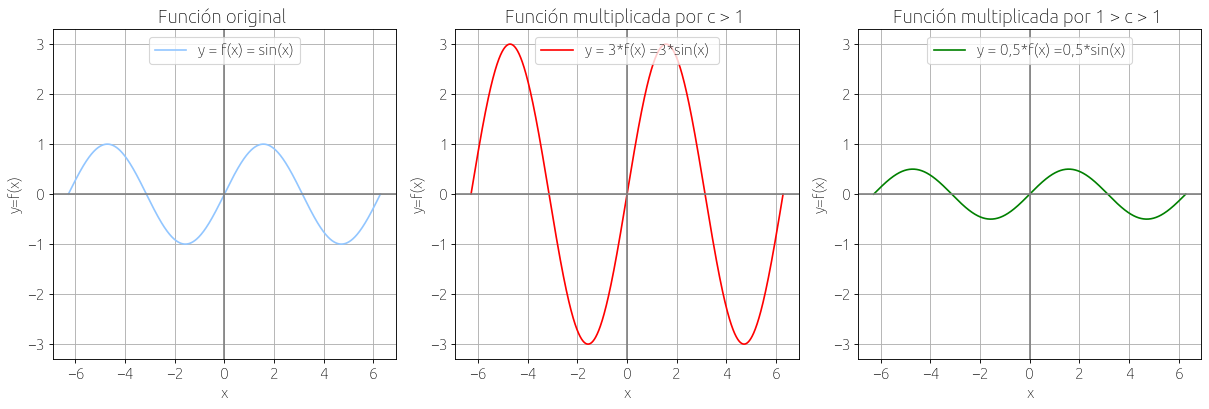

In [334]:
# nbi:hide_in
%matplotlib inline

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

x  = np.linspace(-2*np.pi,2*np.pi,1000)
y  = np.sin(x)
y1 = 3*np.sin(x)
y2 = 0.5*np.sin(x)

#grafico de las las funciones
fig = plt.figure(figsize=(15, 5), dpi= fig_dpi , constrained_layout=True)
gs = fig.add_gridspec(1, 3)

#grafico de la función original
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title("Función original ")
f_ax1.plot(x,y,label='y = f(x) = sin(x)')
f_ax1.set_xlabel("x")
f_ax1.set_ylabel('y=f(x)')
f_ax1.axhline(0, color='grey')
f_ax1.axvline(0, color='grey')
f_ax1.grid()
f_ax1.set_ylim(-3.3, 3.3)
f_ax1.legend(loc = 'upper center')

#grafico de la fucnión desplazada hacia arriba
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("Función multiplicada por c > 1 " )
f_ax2.plot(x,y1,color='r', label='y = 3*f(x) =3*sin(x) ')
f_ax2.set_xlabel('x')
f_ax2.set_ylabel('y=f(x)')
f_ax2.axhline(0, color='grey')
f_ax2.axvline(0, color='grey')
f_ax2.legend(loc='upper center')
f_ax2.set_ylim(-3.3, 3.3)
f_ax2.grid()


#grafico de la fucnión desplazada hacia abajo
f_ax3 = fig.add_subplot(gs[0, 2])
f_ax3.set_title("Función multiplicada por 1 > c > 1 " )
f_ax3.plot(x,y2,color='g', label='y = 0,5*f(x) =0,5*sin(x)')
f_ax3.set_xlabel('x')
f_ax3.set_ylabel('y=f(x)')
f_ax3.axhline(0, color='grey')
f_ax3.axvline(0, color='grey')
f_ax3.legend(loc='upper center')
f_ax3.set_ylim(-3.3, 3.3)
f_ax3.grid()

<div class="alert alert-block alert-warning"> 
    
<b>Para terminar de comprender el proceso les dejo una animación que muestra a la función multipicada por una constante <i>C</i> que va desde $0.2$ a $2$ con pasos de $0.2$. Solo tienen que presionar play.</b>
</div> 

In [4]:
# nbi:hide_in
%matplotlib inline
from matplotlib.animation import FuncAnimation

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(8, 6), dpi= fig_dpi, facecolor='w', edgecolor='k')
ax = plt.axes(xlim=(-2*np.pi, 2*np.pi), ylim=(-2.2, 2.2))
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.grid('on')
texto = ['$y=0,2*sin(x)$', '$y=0,4*sin(x)$', '$y=0,6*sin(x)$', '$y=0,8*sin(x)$', '$y=sin(x)$', '$y=1,2*sin(x)$',
         '$y=1,4*sin(x)$', '$y=1,6*sin(x)$', '$y=1,8*sin(x)$', '$y=2*sin(x)$']


line, = ax.plot([], [], lw=2)
c = np.arange(0.2,2.2,0.2)
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

text = ax.text(0,1.8,texto[0],fontsize=16,bbox=dict(facecolor='lightblue', alpha=1),
                horizontalalignment='center', verticalalignment='bottom')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    plt.close() # por algun motivo que desconozco poniendolo aca borra el plot extra que aparece.
    if i == 0:
        #ax.plot(x, x**2, lw=2,color='red', label='$y=x²$')
        #ax.legend(loc='upper center')
        ax.plot(x, np.sin(x), lw=2,color='red')
        ax.text(0,1.4,texto[4],fontsize=16,bbox=dict(facecolor='red', alpha=0.5),
                horizontalalignment='center', verticalalignment='bottom')
        
    y = c[i]*np.sin(x)
    line.set_data(x, y)
    text.set_text(texto[i])
    

    return line,text,

anim = FuncAnimation(fig, animate, init_func=init, frames=10, interval=1000, blit=True)
HTML(anim.to_jshtml())

#anim.save('imagenes/sine_wave.gif', writer='imagemagick')

## <span style="color:red">  Estiramiento y acortamiento horizontal </span>

<div class="alert alert-block alert-info">
    <b>  Al multiplicar  una constante </b> a la <b> variable independiente</b> de una función <b> cambiará si tamaño</b> respecto al eje $eje$ $x$. Si la $contante>1$ la función dismiuirá de tamaño horizontalmente. Si por el contrario la $1>constante>0$ la función aumentará de tamaño horizontalmente.
    
$$g(x) = f(c*x); c > 1 $$ 
    
$$h(x) = f(c*x); 1>c>0 $$
</div> 

Las coordenadas $y$ de $y=f(c*x)$ en $x$ es la misma que la coordenada $y$ correspondiente de $y=f(x)$ en $c*x$. Así, las coordenadas $x$ en la gráfica de $y=f(x)$ corresponde a las coordenadas $x$ en la gráfica de $y=f(c*x)$ multiplicada por $c$.

En los gráficos podemos ver esto de forma clara. Cunado $c>1$ la función se comprime y cunado $1>c>0$ la función se estira.

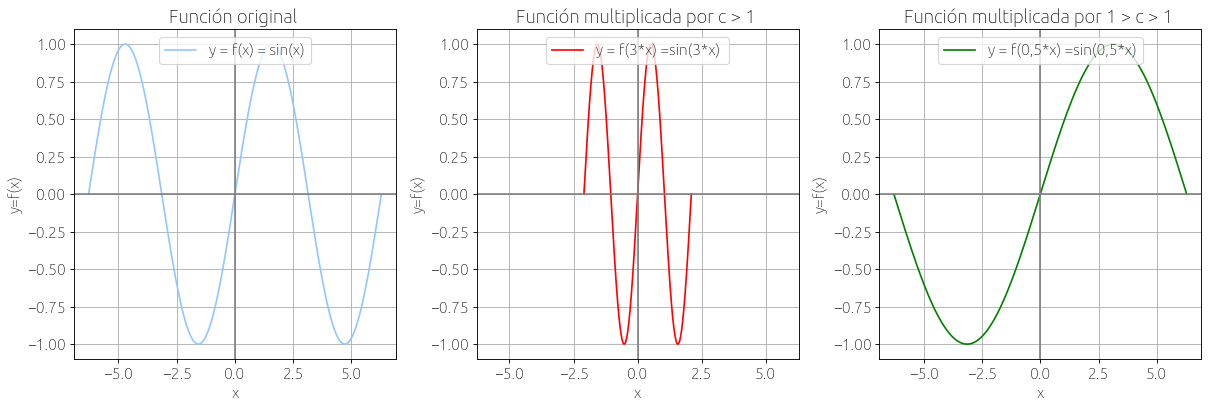

In [376]:
# nbi:hide_in
%matplotlib inline

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

x  = np.linspace(-2*np.pi,2*np.pi,1000)
x1  = np.linspace(-(2/3)*np.pi,(2/3)*np.pi,1000)
y  = np.sin(x)
y1 = np.sin(3*x1)
y2 = np.sin(0.5*x)

#grafico de las las funciones
fig = plt.figure(figsize=(15, 5), dpi= fig_dpi , constrained_layout=True)
gs = fig.add_gridspec(1, 3)

#grafico de la función original
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title("Función original ")
f_ax1.plot(x,y,label='y = f(x) = sin(x)')
f_ax1.set_xlabel("x")
f_ax1.set_ylabel('y=f(x)')
f_ax1.axhline(0, color='grey')
f_ax1.axvline(0, color='grey')
f_ax1.grid()
f_ax1.legend(loc = 'upper center')

#grafico de la fucnión desplazada hacia arriba
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("Función multiplicada por c > 1 " )
f_ax2.plot(x1,y1,color='r', label='y = f(3*x) =sin(3*x) ')
f_ax2.set_xlabel('x')
f_ax2.set_ylabel('y=f(x)')
f_ax2.axhline(0, color='grey')
f_ax2.axvline(0, color='grey')
f_ax2.legend(loc='upper center')
f_ax2.set_xlim(-2*np.pi,2*np.pi)
f_ax2.grid()


#grafico de la fucnión desplazada hacia abajo
f_ax3 = fig.add_subplot(gs[0, 2])
f_ax3.set_title("Función multiplicada por 1 > c > 1 " )
f_ax3.plot(x,y2,color='g', label='y = f(0,5*x) =sin(0,5*x)')
f_ax3.set_xlabel('x')
f_ax3.set_ylabel('y=f(x)')
f_ax3.axhline(0, color='grey')
f_ax3.axvline(0, color='grey')
f_ax3.legend(loc='upper center')
f_ax3.grid()

<div class="alert alert-block alert-warning"> 
    
<b>Para terminar de comprender el proceso les dejo una animación que muestra a la función multipicada por una constante <i>C</i> que va desde $0.2$ a $2$ con pasos de $0.2$. Solo tienen que presionar play.</b>
</div> 

In [5]:
# nbi:hide_in
%matplotlib inline
from matplotlib.animation import FuncAnimation

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(8, 6), dpi= fig_dpi, facecolor='w', edgecolor='k')
ax = plt.axes(xlim=(-4*np.pi, 4*np.pi), ylim=(-2.2, 2.2))
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.grid('on')
texto = ['$y=sin(0,2*x)$', '$y=sin(0,4*x)$', '$y=sin(0,6*x)$', '$y=sin(0,8*x)$', '$y=sin(x)$', '$y=sin(1,2*x)$',
         '$y=sin(1,4*x)$', '$y=sin(1,6*x)$', '$y=sin(1,8*x)$', '$y=sin(2*x)$']


line, = ax.plot([], [], lw=2)
c = np.arange(0.2,2.2,0.2)
x = np.linspace(-4*np.pi, 4*np.pi, 1000)

text = ax.text(0,1.8,texto[0],fontsize=16,bbox=dict(facecolor='lightblue', alpha=1),
                horizontalalignment='center', verticalalignment='bottom')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    plt.close() # por algun motivo que desconozco poniendolo aca borra el plot extra que aparece.
    if i == 0:
        #ax.plot(x, x**2, lw=2,color='red', label='$y=x²$')
        #ax.legend(loc='upper center')
        ax.plot(x, np.sin(x), lw=2,color='red')
        ax.text(0,1.4,texto[4],fontsize=16,bbox=dict(facecolor='red', alpha=0.5),
                horizontalalignment='center', verticalalignment='bottom')
        
    y = np.sin(c[i]*x)
    line.set_data(x, y)
    text.set_text(texto[i])
    

    return line,text,

anim = FuncAnimation(fig, animate, init_func=init, frames=10, interval=1000, blit=True)
HTML(anim.to_jshtml())

#anim.save('imagenes/sine_wave.gif', writer='imagemagick')

<form method="get" action="https://nicolasferragamo.github.io/AEA/index.html">
 <button type="submit">Inicio
</form>
<form method="get" action="https://nicolasferragamo.github.io/AEA/Funciones/Caracteristicas-de-una-funcion.html">
 <button type="submit">Anterior
</form>    
</form> 
<form method="get" action="https://nicolasferragamo.github.io/AEA/Funciones/Trigonometria.html">
 <button type="submit">Siguiente
</form> 

**Copyright**

The notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution-NoComercial 4.0 Internacional](http://creativecommons.org/licenses/by-nc/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Aplicaciones de electrónica Analógica by Nicolás Ferragamo.

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a>

